# Section 4.2 Single Model Visualizations

In [1]:
import os
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change working directory
if os.path.split(os.getcwd())[-1] != "notebooks":
    os.chdir(os.path.join(".."))

np.random.seed(0)

In [2]:
az.style.use('arviz-white')

## Activity: Estimating treatment on plant growth
Your friend statistician friend is really into plants. As a side hobby she decided to test three fertilizers, BudgetFertilizer, GreenPower, and RootsGalore.


![Plants](../../img/Plants.jpg)  

Her methodology was as follows

1. Wait until plants were 10 inches tall
2. Treat with one of the three fertilizers
3. Measure the height of the plant each day until day 10

She was also nice enough to write down the mathematical model for you. Recall that we add 10 to $\mu$ because she waited until the plant was 10 inches high before we start out experiment. Because of this we do not need to estimate the intercept, it's always 10 inches on Day 0. 

$$ 
\beta \sim \mathcal{N}(0,1) \\
\epsilon \sim \operatorname{HalfCauchy}(1) \\
\mu = \beta*x + 10 \\
height \sim \mathcal{N}(\mu, \epsilon)
$$

In this model, x is the days since adding fertilizer (days since treatment), $\beta$ is the growth rate and $\epsilon$ is some noise.

She was able to perform inference runs, these are contained in the files `GreenPower.nc`, `BudgetFertilizer.nc`, and `RootsGalore.nc`. She's been too busy to interpret the results and asked that you help by answering the following questions. Remember your friend is a statistician, so she'll want to know the highest posterior density.

* Which fertilizer helps plants grow the best?
* Which fertilizer exhibits the least variability? Which exhibits the most variability?
* BudgetFertilizer is the cheapest, which is nice because she's on a grad student stipend. Should she use this fertilizer?

Unfortunately she forgot to give you the raw data, but fortunately you just paid attention to Section 4.1 where we learned how to interpret posterior distributions using`az.plot_posterior`, `az.plot_forest`, `az.summary`.

Can you help your friend out?

### Exercise 1: Plot the Posterior Estimations of all three fertilizers

#### Posterior Plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b1189a780>,
      dtype=object)

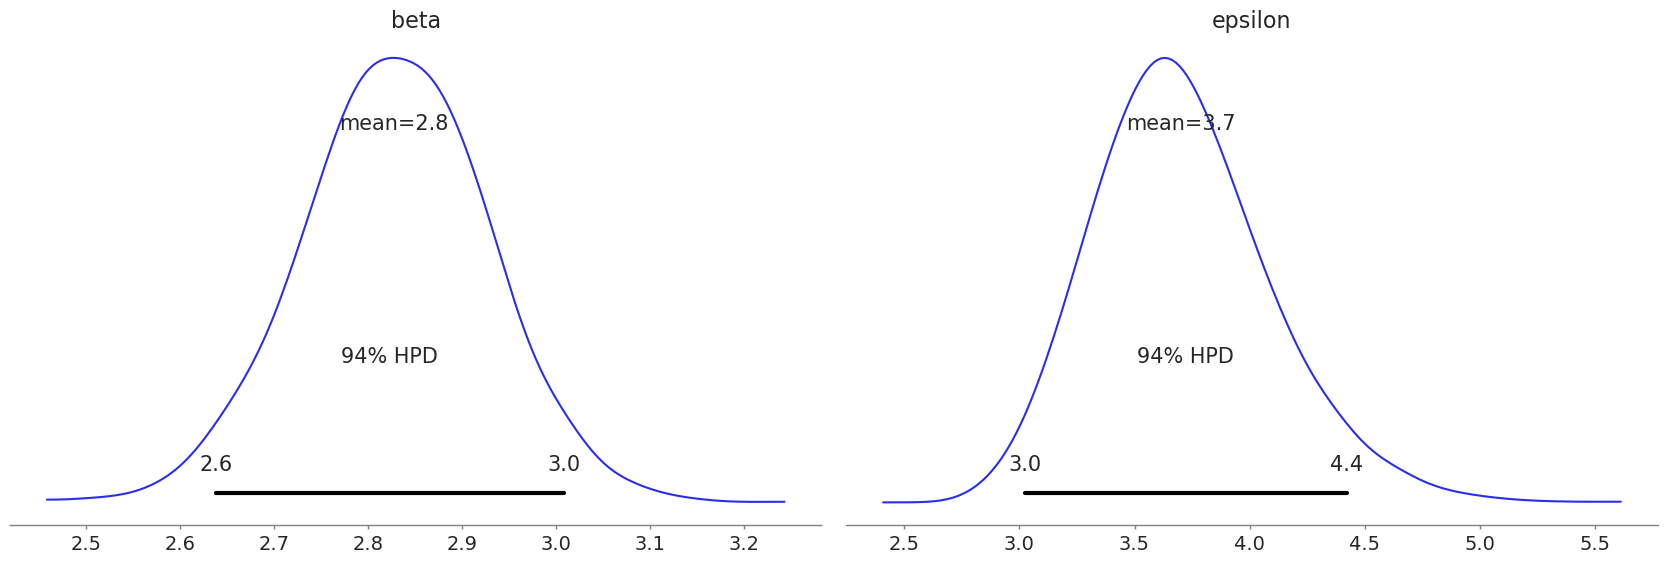

In [3]:
greenpower = az.from_netcdf(os.path.join("inference_data", "GreenPower.nc"))
az.plot_posterior(greenpower)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b34667400>,
      dtype=object)

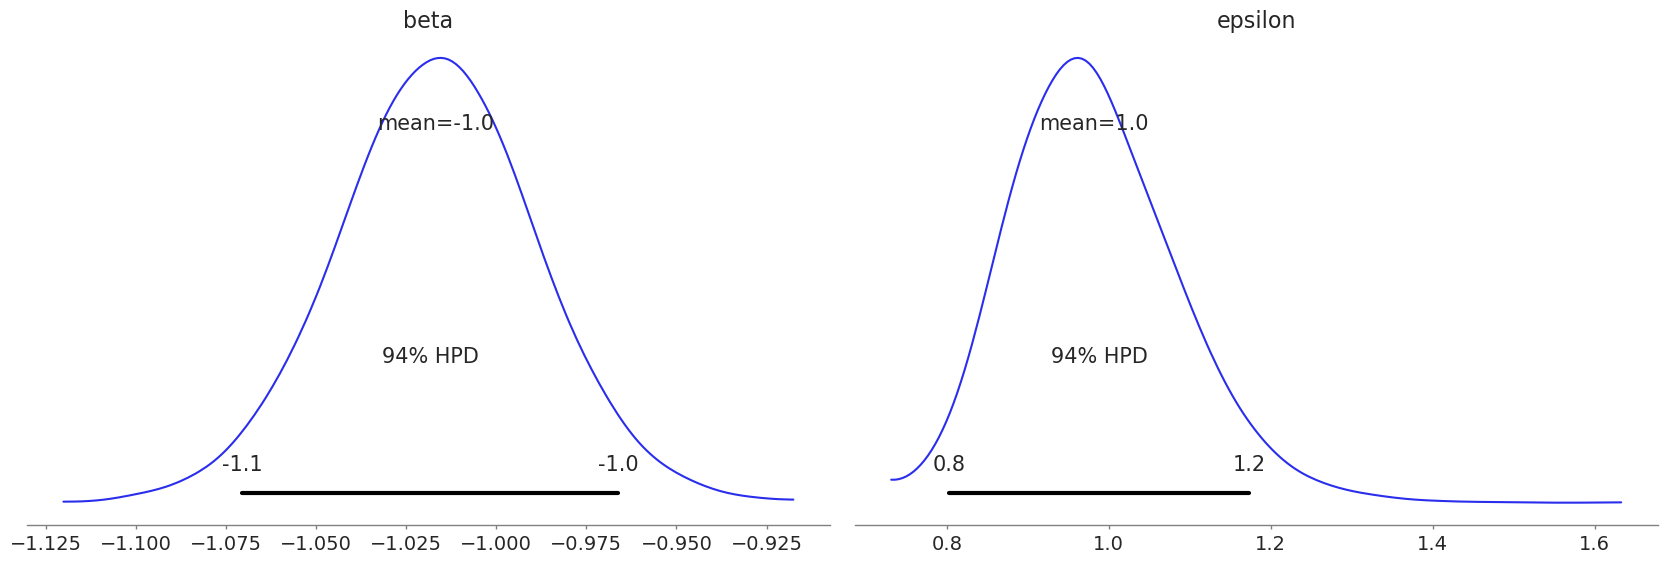

In [4]:
budgetfertilizer = az.from_netcdf(os.path.join("inference_data", "BudgetFertilizer.nc"))
az.plot_posterior(budgetfertilizer)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b349a2e80>,
      dtype=object)

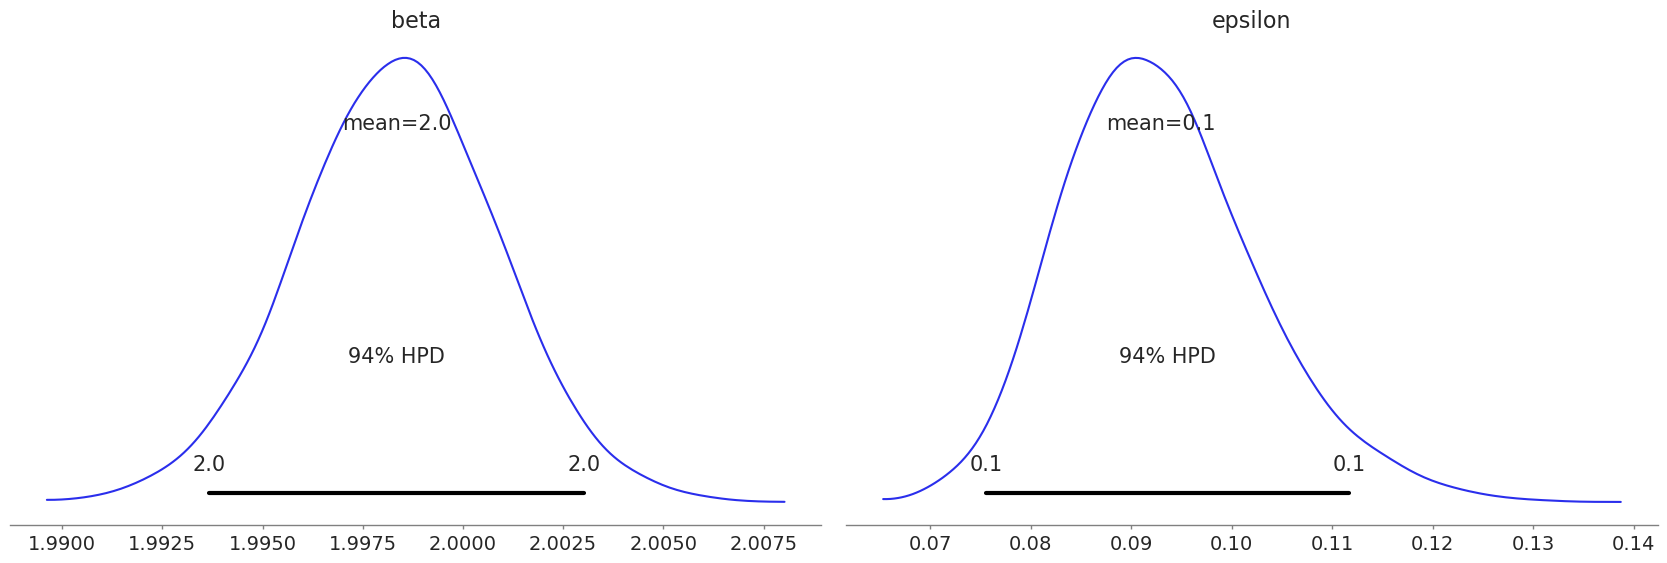

In [5]:
rootsgalore = az.from_netcdf(os.path.join("inference_data", "RootsGalore.nc"))
az.plot_posterior(rootsgalore)

#### Forest Plots
**Hint:** Multiple Inference Runs can be plotted in the same forest plot. Take a look at the `model_names` argument

/home/colin/projects/arviz/arviz/plots/forestplot.py:207: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
/home/colin/projects/arviz/arviz/plots/forestplot.py:208: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


(<Figure size 600x1140 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b348a8630>],
       dtype=object))

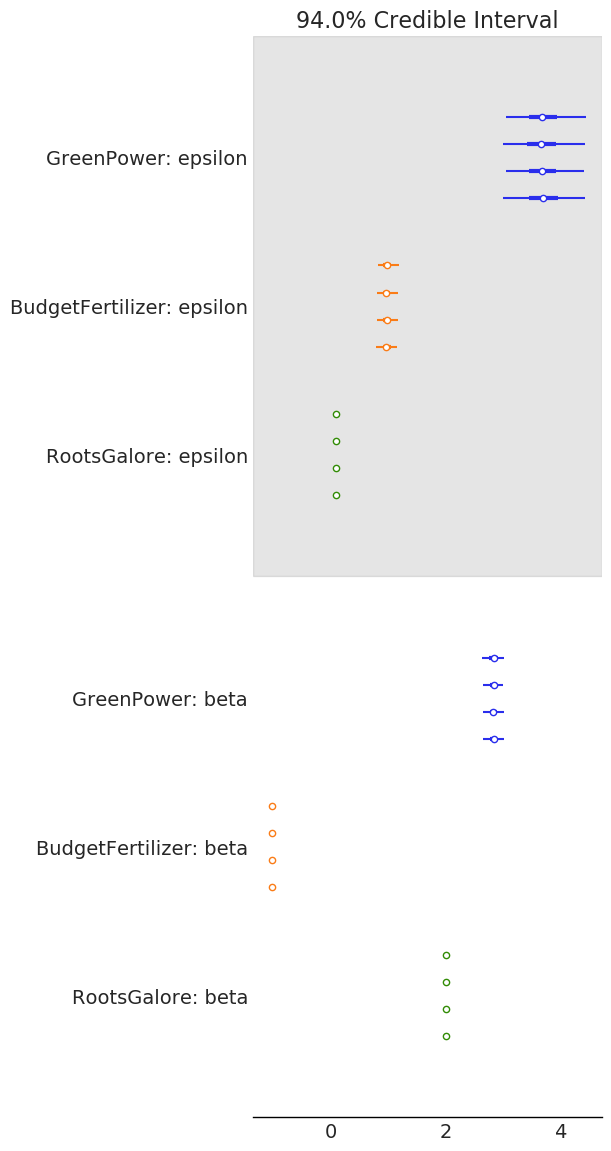

In [6]:
az.plot_forest([greenpower, budgetfertilizer, rootsgalore], model_names=["GreenPower", "BudgetFertilizer", "RootsGalore"])

#### Summary Tables
We can quickly compare numerically by using `az.summary`.

In [7]:
pd.concat([az.summary(greenpower), az.summary(budgetfertilizer), az.summary(rootsgalore)])

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta,2.827,0.099,2.638,3.008,0.001,0.001,7397.0,7391.0,7434.0,5318.0,1.0
epsilon,3.700,0.380,3.023,4.420,0.004,0.003,7409.0,7249.0,7610.0,5905.0,1.0
beta,-1.017,0.028,-1.071,-0.966,0.000,0.000,7646.0,7625.0,7658.0,5840.0,1.0
epsilon,0.982,0.101,0.803,1.174,0.001,0.001,6745.0,6612.0,6872.0,5254.0,1.0
beta,1.998,0.002,1.994,2.003,0.000,0.000,7018.0,7018.0,7033.0,5249.0,1.0
epsilon,0.093,0.010,0.076,0.112,0.000,0.000,7335.0,7088.0,7643.0,5524.0,1.0


Just like the plots above, GreenPower is the best fertilizer for growth, RootsGalore is the most consistent, and BudgetFertilizer is not a good fertilizer as it seems reduce plant height over time.

### Exercise 2: Give recommendations to your friend
* **Which fertilizer helps plants grow the best?**
The estimate of the slope $\beta$ tells us which fertilizer is the best, as it represents day over day growth rate.
    * GreenPower looks like it's the best with a mean $\beta$ (growth rate) of 2.8 and an HPD of 2.6 to 3
* **Which fertilizer is the most consistent? Which is the least consistent?**
The estimated distribution $\epsilon$ indicates the fertilizer variability. 
    * RootsGalore is the most variable  with a mean epsilon of .1 and an HPD of 0.075 to 0.11
    * GreenPower is the lest variable with a mean epsilon of 3.7 and an HPD of 0.075 to 0.11
* **BudgetFertilizer is the cheapest, which is nice because she's on a grad student stipend. Should she use this fertilizer?**
    * No, our model indicates that the growth rate is likely negative, meaning out plant is dying

## Raw Data Plotter
This section is provided in solutions just to show what the raw data looks like. In the exercise this is omitted so students will only have posterior plot and forestplots to make interpretation.

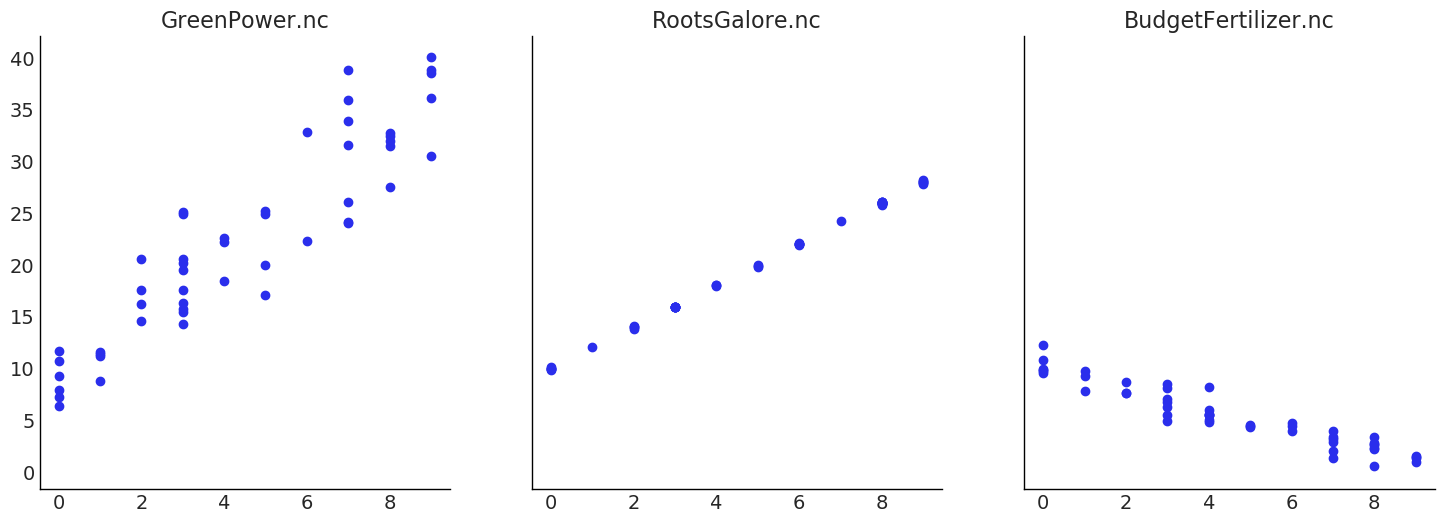

In [8]:
from utils import plant_treatment

fig, axes = plt.subplots(1,3, sharey=True, figsize=(18,6))

for i, treatment in enumerate(plant_treatment.DATASETS):
    ax = axes[i]
    x,y = plant_treatment.data_generator(**treatment)
    ax.scatter(x,y)
    ax.set_title(treatment["name"])